<a href="https://colab.research.google.com/github/gonoott/EntregaFinalOttaviano/blob/main/EntregaFinal_Ottaviano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final: Análisis Climático Ciudad de Roma
# Autor/a: Ottaviano Gonzalo
# Curso: Machine Learning para la Ciencia de Datos

In [ ]:
# Importar librerías necesarias
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# 1. Abstracto: Motivación y audiencia


Abstracto:
El clima es un factor fundamental para planificar viajes y actividades al aire libre, por eso es importante llevar la vestimenta adecuada para cada ocacion climatica, y el espacio en la valija es determinante, ante la imposibilidad de llevar ropa ilimitada, decidi tomar este desafio, algo personal.Y Roma, con su rica historia y atractivo turístico, recibe visitantes durante todo el año.

Este proyecto busca analizar cómo varían las temperaturas en Roma a lo largo de las estaciones, y desarrollar modelos de Machine Learning que permitan predecir la temperatura horaria basándose en datos previos.
La audiencia beneficiada incluye viajeros, agencias de turismo y planificadores urbanos que desean tomar decisiones informadas sobre vestimenta y actividades.

# 2. Definición del problema y preguntas a resolver


Problema a resolver:
Queremos entender la variabilidad estacional de la temperatura en Roma y predecir la temperatura horaria actual usando datos históricos.
Esto se plantea como un problema de regresión, donde la variable objetivo es la temperatura en grados Celsius.

Preguntas clave:
- ¿Cómo varían las temperaturas según la estación del año?
- ¿Qué tan bien podemos predecir la temperatura horaria usando modelos de Machine Learning?
- ¿Cuál modelo ofrece mejor desempeño para esta tarea?


# 3. Obtención de datos históricos


Para responder estas preguntas, descargaremos datos históricos horarios de temperatura para Roma, cubriendo las cuatro estaciones del año 2022-2023.
Usaremos la API de Open-Meteo, que provee datos climáticos confiables y gratuitos.

Primero descargaremos datos mas acotados para entender como varia en escalas de tiempo mas reducidas, durante el largo del dia, para saber si varia mucho entre la mañana y la noche. Tambien durante el transcurso de una semana, que es lo que se podria establecer como un tiempo aceptable para un itinerario vacacional

Adquisición de Datos
El objetivo de esta sección es obtener los datos crudos desde su fuente original, que en este proyecto será una API pública.



In [ ]:
import requests


latitude = 41.89  # Latitud de Roma
longitude = 12.51  # Longitud de Roma
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m"

# Realizamos la solicitud a la api
response = requests.get(url)

# Verificar el estado de la respuesta
if response.status_code == 200:
    data = response.json()
    print("Datos obtenidos con éxito:")
    print(data)
else:
    print("Error al obtener los datos:", response.status_code)


Datos obtenidos con éxito:
{'latitude': 41.875, 'longitude': 12.5, 'generationtime_ms': 0.0286102294921875, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 55.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2025-09-19T00:00', '2025-09-19T01:00', '2025-09-19T02:00', '2025-09-19T03:00', '2025-09-19T04:00', '2025-09-19T05:00', '2025-09-19T06:00', '2025-09-19T07:00', '2025-09-19T08:00', '2025-09-19T09:00', '2025-09-19T10:00', '2025-09-19T11:00', '2025-09-19T12:00', '2025-09-19T13:00', '2025-09-19T14:00', '2025-09-19T15:00', '2025-09-19T16:00', '2025-09-19T17:00', '2025-09-19T18:00', '2025-09-19T19:00', '2025-09-19T20:00', '2025-09-19T21:00', '2025-09-19T22:00', '2025-09-19T23:00', '2025-09-20T00:00', '2025-09-20T01:00', '2025-09-20T02:00', '2025-09-20T03:00', '2025-09-20T04:00', '2025-09-20T05:00', '2025-09-20T06:00', '2025-09-20T07:00', '2025-09-20T08:00', '2025-09-20T09:00', '2025-09-20T10:00', '2025-09-20T11:0


Analisis exploratorio (EDA)
Aqui utilizaremos algunas visualizaciones para ir entendiendo como estan conformadas las variables y que tendencias encontramos

In [ ]:
import pandas as pd

# Convertir los datos de temperatura a un DataFrame
df = pd.DataFrame(data['hourly'])

# Seleccionar columnas relevantes
df = df[['time', 'temperature_2m']]

# Renombrar columnas
df.columns = ['hora', 'temperatura']

# Convertir la columna de hora a tipo datetime
df['hora'] = pd.to_datetime(df['hora'])

# Mostrar el DataFrame limpio
print(df.head())


                 hora  temperatura
0 2025-09-19 00:00:00         21.0
1 2025-09-19 01:00:00         20.6
2 2025-09-19 02:00:00         20.1
3 2025-09-19 03:00:00         19.7
4 2025-09-19 04:00:00         19.4


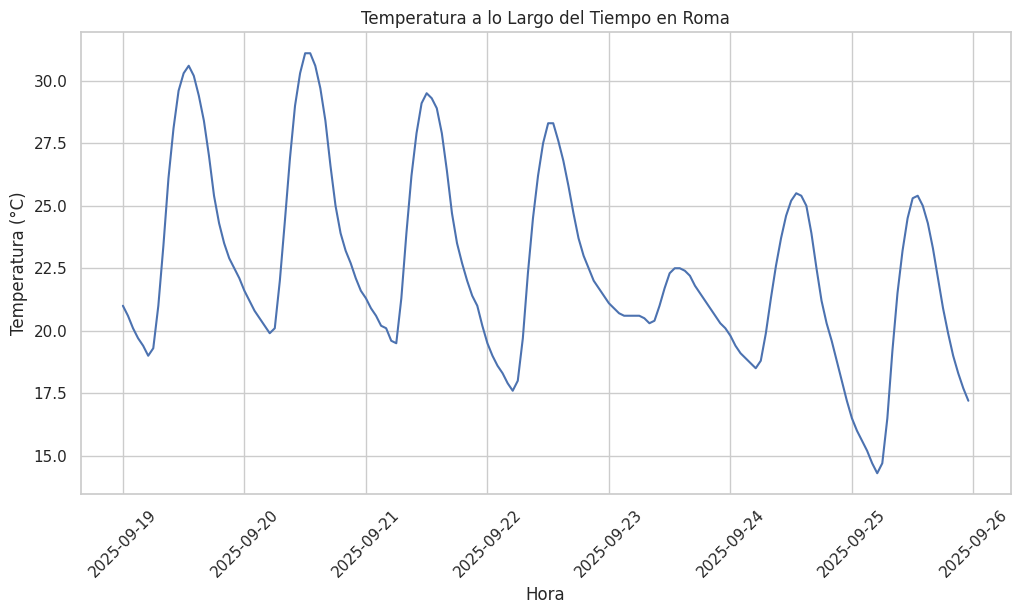

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de la temperatura a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hora', y='temperatura')
plt.title('Temperatura a lo Largo del Tiempo en Roma')
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.show()


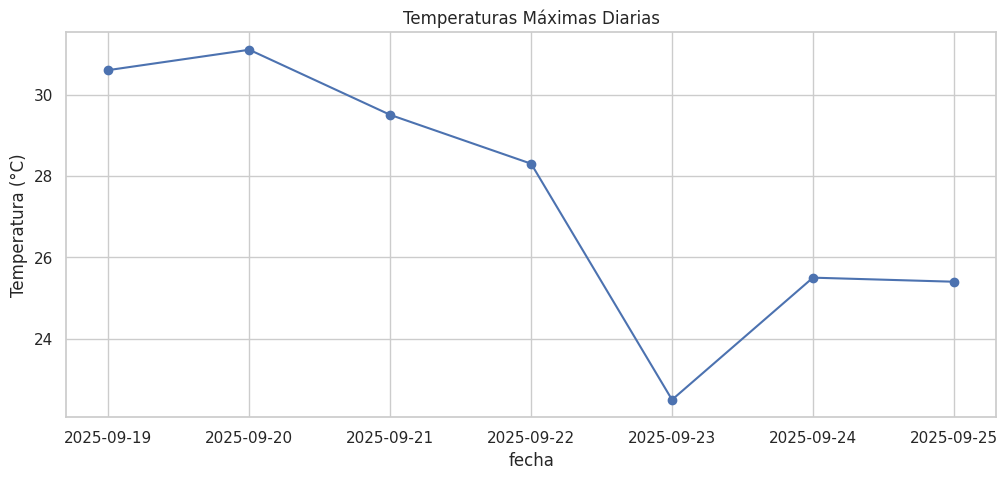

In [ ]:
# Tendencia de temperaturas máximas diarias
df['fecha'] = df['hora'].dt.date
daily_max = df.groupby('fecha')['temperatura'].max()

plt.figure(figsize=(12, 5))
daily_max.plot(marker='o')
plt.title('Temperaturas Máximas Diarias')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


Aqui comenzmos con la segunda parte, que es el analisis de datos mas extenso, que involucra varios años


In [ ]:
def descargar_datos_historicos(start_date, end_date, lat, lon):
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m"
    )
    print(f"Descargando datos desde {start_date} hasta {end_date}...")
    response = requests.get(url)
    data = response.json()
    temps = data['hourly']['temperature_2m']
    times = data['hourly']['time']
    df = pd.DataFrame({'time': pd.to_datetime(times), 'temperature_2m': temps})
    return df

latitude = 41.9028
longitude = 12.4964

periodos = {
    'Invierno': ("2022-12-01", "2023-02-28"),
    'Primavera': ("2023-03-01", "2023-05-31"),
    'Verano': ("2023-06-01", "2023-08-31"),
    'Otoño': ("2023-09-01", "2023-11-30"),
}

dfs = []
for estacion, (start, end) in periodos.items():
    df_temp = descargar_datos_historicos(start, end, latitude, longitude)
    df_temp['season'] = estacion
    dfs.append(df_temp)

df = pd.concat(dfs).reset_index(drop=True)

print("\nPrimeras filas de los datos descargados:")
display(df.head())

Descargando datos desde 2022-12-01 hasta 2023-02-28...
Descargando datos desde 2023-03-01 hasta 2023-05-31...
Descargando datos desde 2023-06-01 hasta 2023-08-31...
Descargando datos desde 2023-09-01 hasta 2023-11-30...

Primeras filas de los datos descargados:


,time,temperature_2m,season
0,2022-12-01 00:00:00,4.7,Invierno
1,2022-12-01 01:00:00,4.6,Invierno
2,2022-12-01 02:00:00,4.2,Invierno
3,2022-12-01 03:00:00,4.0,Invierno
4,2022-12-01 04:00:00,3.9,Invierno


# 4. Análisis Exploratorio de Datos (EDA)


Exploramos las características principales de los datos para entender la distribución de temperaturas por estación.
Calculamos estadísticas descriptivas y visualizamos la variabilidad mediante boxplots.



Estadísticas de temperatura por estación:


,mean,min,max,std
season,,,,
Verano,25.210054,13.2,40.2,5.452558
Otoño,18.763324,0.4,33.1,5.861078
Invierno,8.717176,-1.9,18.5,4.373881
Primavera,13.803216,1.8,27.6,4.782123


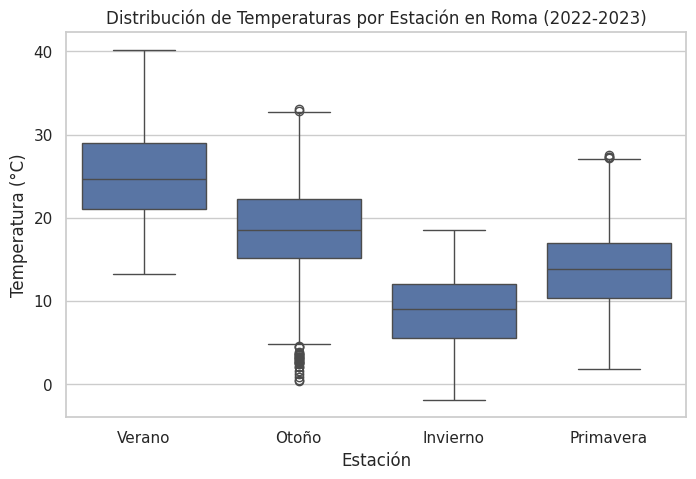


Verificamos que no existan valores faltantes en las variables principales:
time              0
temperature_2m    0
season            0
dtype: int64


In [ ]:
season_stats = df.groupby('season')['temperature_2m'].agg(['mean', 'min', 'max', 'std']).reindex(['Verano', 'Otoño', 'Invierno', 'Primavera'])
print("\nEstadísticas de temperatura por estación:")
display(season_stats)

plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='temperature_2m', data=df, order=['Verano', 'Otoño', 'Invierno', 'Primavera'])
plt.title('Distribución de Temperaturas por Estación en Roma (2022-2023)')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Estación')
plt.show()

print("\nVerificamos que no existan valores faltantes en las variables principales:")
print(df.isnull().sum())

# 5. Ingeniería de Atributos

Para predecir la temperatura horaria, creamos variables que representen las temperaturas de las 5 horas previas (variables lag).
Esto permite capturar la dependencia temporal natural de la temperatura.
Además, seleccionamos las características más relevantes para el modelo usando SelectKBest.


In [ ]:
df = df.sort_values('time').reset_index(drop=True)

for lag in range(1, 6):
    df[f'temp_lag_{lag}'] = df['temperature_2m'].shift(lag)

df_model = df.dropna().reset_index(drop=True)

X = df_model[[f'temp_lag_{lag}' for lag in range(1, 6)]]
y = df_model['temperature_2m']

k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print("\nCaracterísticas seleccionadas para el modelo:", list(selected_features))



Características seleccionadas para el modelo: ['temp_lag_1', 'temp_lag_2', 'temp_lag_3']


# 6. Entrenamiento y Testeo de Modelos

Entrenamos dos modelos de regresión para predecir la temperatura horaria:
- Random Forest Regressor
- Regresión Lineal

Utilizamos validación cruzada para evaluar su desempeño en el conjunto de entrenamiento.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(random_state=42)
model_lr = LinearRegression()

cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"\nRandom Forest CV MSE (media): {-np.mean(cv_scores_rf):.4f}")

cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV MSE (media): {-np.mean(cv_scores_lr):.4f}")

model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)




Random Forest CV MSE (media): 0.8679
Linear Regression CV MSE (media): 0.8130


# 7. Optimización de Hiperparámetros

Para mejorar el desempeño del Random Forest, realizamos una búsqueda de hiperparámetros con GridSearchCV.
Esto nos permite encontrar la mejor configuración para el modelo.

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nMejores hiperparámetros Random Forest:")
print(grid_search.best_params_)

model_rf_opt = grid_search.best_estimator_
y_pred_rf_opt = model_rf_opt.predict(X_test)


Mejores hiperparámetros Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


# 8. Evaluación y Selección de Modelo


Evaluamos los modelos en el conjunto de prueba:

Evaluación modelo Random Forest (default):
  MSE: 0.8155
  MAE: 0.6736
  R2: 0.9878

Evaluación modelo Regresión Lineal:
  MSE: 0.7936
  MAE: 0.6603
  R2: 0.9882

Evaluación modelo Random Forest (optimizado):
  MSE: 0.7614
  MAE: 0.6496
  R2: 0.9886


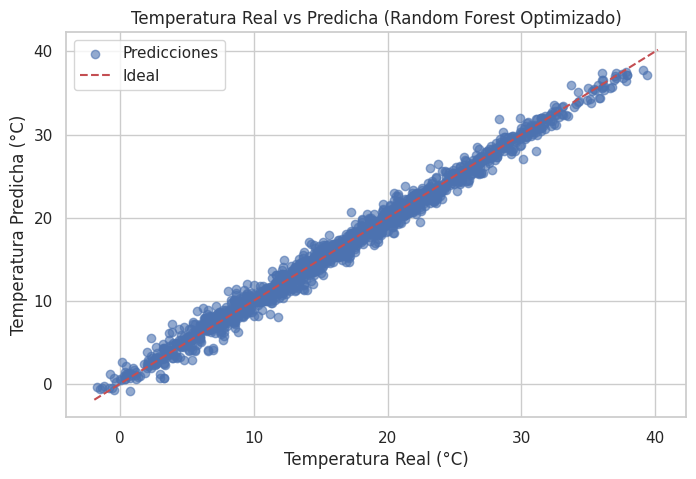

In [ ]:
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluación modelo {nombre_modelo}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2: {r2:.4f}")
    return mse, mae, r2

print("Evaluamos los modelos en el conjunto de prueba:")
mse_rf, mae_rf, r2_rf = evaluar_modelo(y_test, y_pred_rf, "Random Forest (default)")
mse_lr, mae_lr, r2_lr = evaluar_modelo(y_test, y_pred_lr, "Regresión Lineal")
mse_rf_opt, mae_rf_opt, r2_rf_opt = evaluar_modelo(y_test, y_pred_rf_opt, "Random Forest (optimizado)")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf_opt, alpha=0.6, label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.title('Temperatura Real vs Predicha (Random Forest Optimizado)')
plt.legend()
plt.grid(True)
plt.show()


# 9. Conclusiones y recomendaciones


Conclusiones:

- El análisis confirma que Roma tiene un clima mediterráneo con variaciones estacionales claras.
- El modelo Random Forest optimizado es el más adecuado para predecir la temperatura horaria.
- Las variables lag seleccionadas capturan bien la dependencia temporal de la temperatura.
- La regresión lineal es una alternativa simple pero con menor precisión.
- Este enfoque puede ayudar a viajeros y planificadores a anticipar condiciones climáticas y tomar mejores decisiones.
- Futuras mejoras incluyen incorporar más variables climáticas y ampliar el rango temporal de los datos.

Recomendaciones:
- El clima es uno de los fenómenos más difíciles de predecir, ya que involucra numerosas variables y condiciones que pueden modificarlo. Por lo tanto, se sugiere utilizar este trabajo únicamente como un modelo de referencia para preparar el equipaje según la época del año en que se decida viajar, lo que permitirá una mayor eficiencia y evitará llevar ropa innecesaria.
